# Apriori Algorithm for Walmart items

Step 1: Importing the required libraries

In [ ]:
!pip3 install mlxtend

In [ ]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

Step 2: Loading and exploring the data


In [ ]:
# Loading the Data
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/AssociationRules/Online_Retail/data/Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Exploring the columns of the data
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Exploring the different regions of transactions
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Step 3: Cleaning the Data

In [ ]:
# Stripping extra spaces in the description
data['Description'] = data['Description'].str.strip()

# Dropping the rows without any invoice number
data.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

# Dropping all transactions which were done on credit
data = data[~data['InvoiceNo'].str.contains('C')]


Step 4: Splitting the data according to the region of transaction


In [ ]:
# Transactions done in France
basket_France = (data[data['Country'] =="France"]
		.groupby(['InvoiceNo', 'Description'])['Quantity']
		.sum().unstack().reset_index().fillna(0)
		.set_index('InvoiceNo'))

# Transactions done in the United Kingdom
basket_UK = (data[data['Country'] =="United Kingdom"]
		.groupby(['InvoiceNo', 'Description'])['Quantity']
		.sum().unstack().reset_index().fillna(0)
		.set_index('InvoiceNo'))

# Transactions done in Portugal
basket_Por = (data[data['Country'] =="Portugal"]
		.groupby(['InvoiceNo', 'Description'])['Quantity']
		.sum().unstack().reset_index().fillna(0)
		.set_index('InvoiceNo'))

# Transactions done in Sweden
basket_Sweden = (data[data['Country'] =="Sweden"]
		.groupby(['InvoiceNo', 'Description'])['Quantity']
		.sum().unstack().reset_index().fillna(0)
		.set_index('InvoiceNo'))


In [ ]:
basket_Sweden

Description,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE WOODLAND,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 RAFFIA RIBBONS VINTAGE CHRISTMAS,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,...,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODLAND CHARLOTTE BAG,WOODLAND SMALL RED FELT HEART,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP VINTAGE DOILY,WRAP ALPHABET DESIGN,WRAP DOLLY GIRL,WRAP RED VINTAGE DOILY,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
538848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,...,0.0,0.0,0.0,0.0,576.0,0.0,0.0,0.0,0.0,0.0
540040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542911,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0
546161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546530,0.0,768.0,384.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Step 5: Hot encoding the Data



In [ ]:
# Defining the hot encoding function to make the data suitable
# for the concerned libraries
def hot_encode(x):
	if(x<= 0):
		return 0
	if(x>= 1):
		return 1

# Encoding the datasets
basket_encoded = basket_France.applymap(hot_encode)
basket_France = basket_encoded

basket_encoded = basket_UK.applymap(hot_encode)
basket_UK = basket_encoded

basket_encoded = basket_Por.applymap(hot_encode)
basket_Por = basket_encoded

basket_encoded = basket_Sweden.applymap(hot_encode)
basket_Sweden = basket_encoded


In [ ]:
basket_Sweden

Description,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE WOODLAND,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 RAFFIA RIBBONS VINTAGE CHRISTMAS,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,...,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODLAND CHARLOTTE BAG,WOODLAND SMALL RED FELT HEART,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP VINTAGE DOILY,WRAP ALPHABET DESIGN,WRAP DOLLY GIRL,WRAP RED VINTAGE DOILY,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
538848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539338,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
540040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
542428,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
542911,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
546161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546530,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
547645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Step 6: Building the models and analyzing the results


France

In [ ]:
# Building the model
frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())


                                           antecedents  \
45                        (JUMBO BAG WOODLAND ANIMALS)   
260  (PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...   
272  (PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...   
302  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...   
301  (SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...   

                         consequents  antecedent support  consequent support  \
45                         (POSTAGE)            0.076531            0.765306   
260                        (POSTAGE)            0.051020            0.765306   
272                        (POSTAGE)            0.053571            0.765306   
302  (SET/6 RED SPOTTY PAPER PLATES)            0.102041            0.127551   
301    (SET/6 RED SPOTTY PAPER CUPS)            0.102041            0.137755   

      support  confidence      lift  leverage  conviction  
45   0.076531       1.000  1.306667  0.017961         inf  
260  0.051020       1.000  1.306667  0.011974     

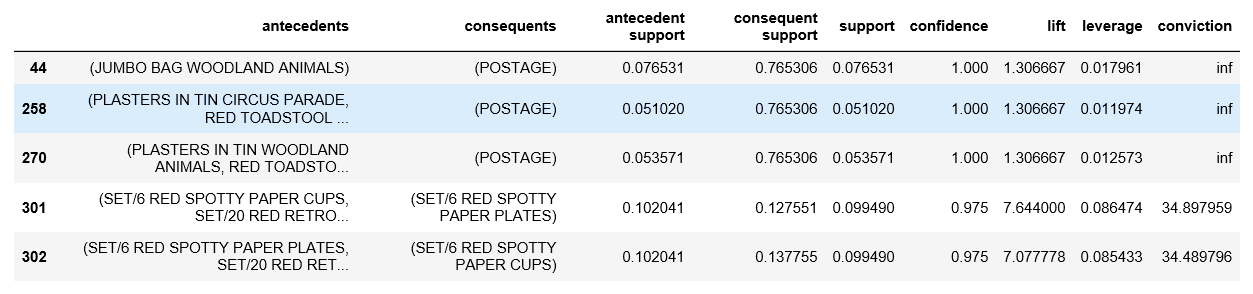

United Kingdom

In [ ]:
frq_items = apriori(basket_UK, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())


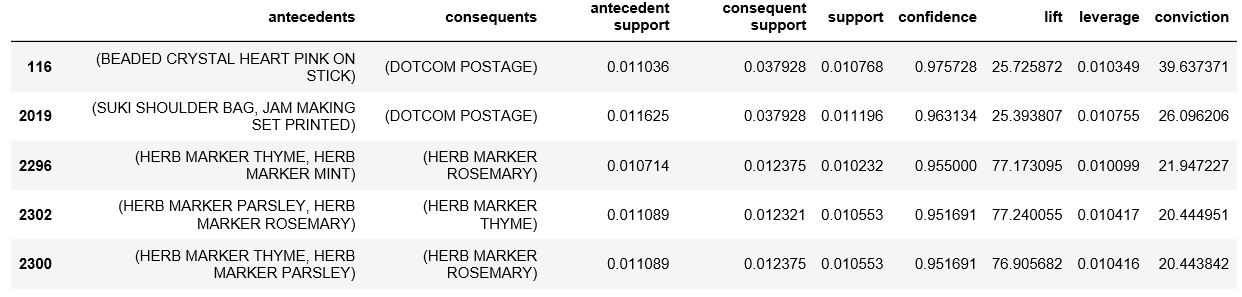

Portugal

In [ ]:
frq_items = apriori(basket_Por, min_support = 0.05, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())


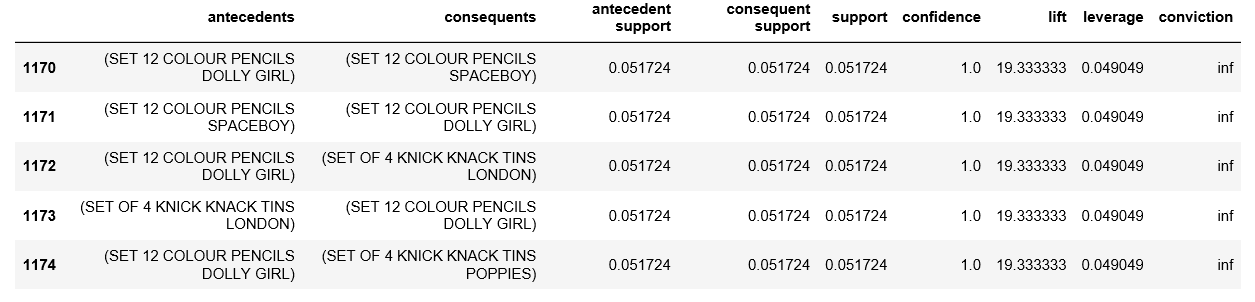



Sweden

In [ ]:
frq_items = apriori(basket_Sweden, min_support = 0.05, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())


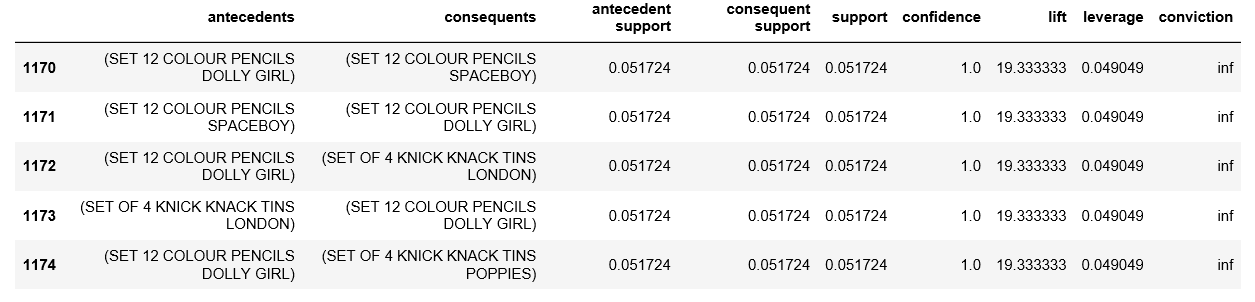

